# Estrazione di un Waveformset (Lez Enrique - Giorno5)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from waffles.input_output.hdf5_structured import load_structured_waveformset

'''
import mplhep
mplhep.style.use(mplhep.style.ROOT)
plt.rcParams.update({'font.size': 16,
                        'grid.linestyle': '--',
                        'axes.grid': True,
                        'figure.autolayout': True,
                        'figure.figsize': [14,6]
                        })
'''

"\nimport mplhep\nmplhep.style.use(mplhep.style.ROOT)\nplt.rcParams.update({'font.size': 16,\n                        'grid.linestyle': '--',\n                        'axes.grid': True,\n                        'figure.autolayout': True,\n                        'figure.figsize': [14,6]\n                        })\n"

In [2]:
wfset = load_structured_waveformset("/eos/experiment/neutplatform/protodune/experiments/ProtoDUNE-VD/commissioning/processed/run039033_cathode/processed_np02vd_raw_run039033_0000_df-s04-d0_dw_0_20250823T131246.hdf5_structured_cathode.hdf5", max_to_load=80000)
#wfset = load_structured_waveformset("/eos/experiment/neutplatform/protodune/experiments/ProtoDUNE-VD/commissioning/processed/run039105_cathode/processed_np02vd_raw_run039105_0000_df-s05-d0_dw_0_20250824T210850.hdf5.copied_structured_cathode.hdf5", max_to_load=80000)
#wfset = load_structured_waveformset("/eos/experiment/neutplatform/protodune/experiments/ProtoDUNE-VD/commissioning/processed/run038648_membrane/processed_np02vd_raw_run038648_0000_df-s05-d0_dw_0_20250811T171107.hdf5.copied_structured_membrane.hdf5", max_to_load=80000)
#wfset = load_structured_waveformset("/eos/experiment/neutplatform/protodune/experiments/ProtoDUNE-VD/commissioning/processed/run038584_membrane/processed_np02vd_raw_run038584_0000_df-s04-d0_dw_0_20250805T125414.hdf5.copied_structured_membrane.hdf5", max_to_load=80000)
#wfset = load_structured_waveformset("/eos/experiment/neutplatform/protodune/experiments/ProtoDUNE-VD/commissioning/processed/run039105_membrane/processed_np02vd_raw_run039105_0000_df-s05-d0_dw_0_20250824T210850.hdf5.copied_structured_membrane.hdf5", max_to_load=80000)

📤 load_structured_waveformset returning type: <class 'waffles.data_classes.WaveformSet.WaveformSet'> with 80000 waveforms


In [3]:
wfset

WaveformSet with 80000 waveforms runs: {39033}, points_per_wf: 1024, available_channels: {39033: {106: {32, 1, 2, 3, 4, 5, 6, 7, 33, 34, 35, 36, 37, 0, 30, 31}}}, record_numbers per run: run 39033: 82 records

# Appunti sulle classi WaveformSet e Waveform (Lez Enrique - Giorno4)
(Provo a riprodurre i passaggi che ci ha mostrato Enrique il Giorno4, quando ci ha accennato alle Waveforms. Il che equivale a studiare come sono fatti gli oggetti definiti come WaveformSet e Waveform, a partire dai file .py contenuti nel branch di Enrique: src/waffles/data_classes.)

_[NB
Per comprendere al meglio il significato di questi elementi, è necessario conoscere la struttura di base dell'elettronica in uso ed il modo (a grandi linee) con cui il segnale viene acquisito nonchè il suo significato, dato che questi sono i dati veri e propri che vengono dal processo di misura e vengono immagazzinati in classi apposite, create proprio per leggere e lavorare con le informazioni di nostro interesse con facilità. L'uso di questi oggetti assume un significato vero e proprio durante il processo di analisi dati a livello sotftware a proposito dell'efficienza della strumentazione in fase di validazione solo quando si comprende l'origine della natura e delle proprietà dei dati a livello hardware.
Qui si vede come chi lavora a cavallo tra l'hardware ed il software necessita di conoscere in maniera approfondita entrambe le unità, per poter sfruttare le informazioni necessarie in modo ottimale e utile.]_

OSSERVA
Si osservi che in entrambe le classi che qui vengono analizzate è presente un metodo **repr**, il quale ha come obiettivo quello di permettere allo user di vedere le caratteristiche principali volute dell'oggetto in forma leggibile semplicemente facendo il print del nome dell'oggetto stesso (qui su Jupyter, a differenza di Python vero e proprio, non c'è nemmeno bisogno di scrivere print, basta indicare il nome).

----> **WAVEFORM SET**

Il wfset è un oggetto della classe "WaveformSet", il cui obiettivo è quello di avere una raccolta delle waveforms misurate come elementi della lista wfset.

METODI
- Il **costruttore** che inizializza l'oggetto necessita in input di una lista (non vuota) che rappresenta il wfset stesso. Le scritte "@property" sono dei _decorators_ di Python, i quali permettono di impostare in modo opportuno i livello di privacy che in C++ sono garantiti automaticamente nella programmazione orientata agli oggetti.
- Il metodo **analyse** ha come obiettivo quello di analizzare il waveformset e restituisce un dizionario x dove le chiavi sono l'indice di ciascuna waveform contenuta nel set (so that x[i] is the output of the self.__waveforms[i].analyse() method) e contiene l'informazione sull'analisi compiuta di ciascuna wf.
- Il metodo **filter**, attraverso "wf_filter: Callable", serve a filtrare del set in questione un filtro sulle waveform ivi contenute, infatti restituisce una lista di indici delle wf che il metodo stesso ha valutato come True. A questo metodo si aggiunge il successivo **from_filtered_WaveformSet** che genera in output un nuovo wfset che contiene solo le waveforms selezionate attraverso il filtro.
- Il metodo **merge** fa un merge del waveformSet passato in ingresso su quello su cui il metodo è stato invocato, questo avviene solo se l'attributo points_per_wf è lo stesso per i due oggetti in gioco.
Ci sono altri metodi, alcuni dei quali sono chiamati all'interni di altri metodi ed altri che are not supposed tp be used by the user. In caso, leggili for fun (lol, non lo farò se non è necessario).

ATTRIBUTI
- Con **waveforms** si ottiene una lista di oggetti waveform (si tratta del contenuto che dà un senso al waveformSet stesso), per cui si può accedere a ciascuno di questi mediante le parentesi quadre: wfset[i] è l'i-esimo oggetto di tipo waveform contenuto nel set.
- L'attributo **points_per_wf** mostra con un int il numero di punti (?????: number of entries for the adcs attribute of each Waveform object) che sono associati a ciascuna waveform, ma si tratta sempre dello stesso dato che è pari a 1024.
- Usando **runs** è un set di int che contiene il numero identificativo del run che ha generato del waveformSet.
- Attributo **record_numbers** è un dizionario di set la cui chiave è il run ed il valore corrispondente è un set di interi che contiene i record numbers (?????).
- L'attributo **available_channels** è un dizionario di dizionario di set :). La chiave è il numero che indentifica il run (int), mentre il valore è un dizionario esso stesso. Questo dizionario interno ha come chiave l'endpoint e come valore è un set di canali (set di int).
_[Sto avendo problemi a capire perchè per alcune cose sono previste delle liste, come per esempio i run qui oppure per lo stesso run un solo ending point, mentre la classe prevede che ci siano dei set. Praticamente non ho capito quando viene fatta una misura, come funziona la misura stessa: in che rapporto stanno run, wfset, wf, endpoints. FORSE si capisce meglio una volta che studio cosa è in effetti l'oggetto waveform e quali sono le sue caratteristiche. Inoltre, devo studiarmi meglio l'elettronica del PDS per poter comprendere cosa sono questi punti, canali, ecc... Poi da chiedere meglio ad Enrique lunedì per chiarificare, si spera, tutto quanto.]_
_[Aggiornamento **]_
- L'attributo **mean_adcs** restituisce la media degli array degli adc (?????) di tutti o parte degli oggetti waveform contenuti nel set in questione.
- **mean_adcs_idcs** è una tupla di interi che contiene l'indice di ciascuna waveform del set in questione, che sono stati usati per il calcolo della media degli array di adc con il metodo precedente.

In [4]:
#Mostra una lista di oggetti waveform contenuti nel set
n=80000
wfset.waveforms

[Waveform: run_number: 39033, endpoint: 106, channel: 1, record_number: 1, time_step_ns: 16.0, timestamp: 109747172924683168 [ticks], daq_window_timestamp: 109747172924992098 [ticks], starting_tick: 0, time_offset: 0,
 Waveform: run_number: 39033, endpoint: 106, channel: 2, record_number: 1, time_step_ns: 16.0, timestamp: 109747172924683168 [ticks], daq_window_timestamp: 109747172924992098 [ticks], starting_tick: 0, time_offset: 0,
 Waveform: run_number: 39033, endpoint: 106, channel: 3, record_number: 1, time_step_ns: 16.0, timestamp: 109747172924683168 [ticks], daq_window_timestamp: 109747172924992098 [ticks], starting_tick: 0, time_offset: 0,
 Waveform: run_number: 39033, endpoint: 106, channel: 4, record_number: 1, time_step_ns: 16.0, timestamp: 109747172924683168 [ticks], daq_window_timestamp: 109747172924992098 [ticks], starting_tick: 0, time_offset: 0,
 Waveform: run_number: 39033, endpoint: 106, channel: 5, record_number: 1, time_step_ns: 16.0, timestamp: 109747172924683168 [ti

In [5]:
#Mostra una lista di oggetti waveform contenuti nel set
m=5
wf = wfset.waveforms[m]
wf

Waveform: run_number: 39033, endpoint: 106, channel: 6, record_number: 1, time_step_ns: 16.0, timestamp: 109747172924683168 [ticks], daq_window_timestamp: 109747172924992098 [ticks], starting_tick: 0, time_offset: 0

In [6]:
#Mostra quanti "punti" (?????) ci sono per ciascuna waveform
wfset.points_per_wf

1024

In [7]:
#Mostra (sotto forma di lista) il run che ha generato quel wfset
wfset.runs

{39033}

In [8]:
#Mostra i record numbers (?????)
wfset.record_numbers

{39033: {1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82}}

In [9]:
#Mostra il run, endpoint (IP individuato da DAPHNE: 106 membrana, 107 catodo), e la numerazione dei canali)
wfset.available_channels

#[Aggiornamento: ad esempio ho capito che qui il run secifico selezionato ho preso l'accesso di wfset è specifico per la membrana, questo è il motivo per cui c'è solo il 107 come chiave della directory nella directory :).]"""

{39033: {106: {0, 1, 2, 3, 4, 5, 6, 7, 30, 31, 32, 33, 34, 35, 36, 37}}}

In [10]:
#Media degli array degli adc
wfset.mean_adcs

#(non capisco perchè non mi dà niente se eseguo la cella)

----> **WAVEFORM**

L'oggetto wf appartiene alla classe Waveform, che eredita dall'ulteriore classe "WaveformAdcs" e contiene le informazioni relative al redout prodotto dal detector per la waveform in questione.

METODI
- Il **costruttore** permette di inizializzare un oggetto di questa classe con gli attributi corrispondenti. Anche qui rimane valido il discorto sui decorator @property.
E poi c'è un metodo anche qui che non è supposed to be used by the user.

ATTRIBUTI
- L'attributo **timestamp** corrisponde al numero di tick (step temporali) in cui è avvenuta la misura e che restituisce, moltiplicando per il time_stp_ns, la durata totale in nanosecondi del tempo totale della waveform.
- L'attributo **time_step_ns** è la distanza tra due tick temporali (informazione ereditata dalla classe WaveformAdcs, è lo stesso per tutte le waveform ed è pari a 16ns.
- L'attributo **daq_window_timestamp** fa riferimento al numero di tick temporali di apertura della finestra temporale, tempo in cui il DAQ ha acquisito il segnale.
- L'attributo **adcs** è un array di interi ereditato da WaveformAdcs che mostra il readout in termini dell'ADC.
- L'attributo **run_number** è un intero che rappresenta il numero del run corrispondente che ha permesso di avere la waveform.
- L'attributo **record_number** è un intero, si tratta del number of the record within which this Waveform was acquired.
- L'attributo **endpoint** mostra se il modulo che ha registrato la waveform si trova sul catodo (106) o membrana (107).
- L'attributo **channel** corrisponde al numero del canale (?????).
- L'attributo **time_offset** è un intero ereditato da WaveformAdcs, si tratta di un tempo di offset scritto in unità di time_stamp_ns e serve come allineamento per le diverse WaveformAdcs for plotting and analysis purposes.
- L'attributo **starting_tick** è un intero che mostra qual è il primo tick utile per un segnale non nullo (se la waveform viene acquisita nella finestra temporale a partire dal secondo tick, allora questo assume il valore di 2).
- L'attributo **analyses** OrderedDict of WfAna objects (inherited from WaveformAdcs).

In [11]:
#Mostra il numero di tick associati alla durata della waveform
wf.timestamp

109747172924683168

In [12]:
#Mostra l'intervallo di tempo individuato da due ticks successivi
wf.time_step_ns

16.0

In [13]:
#Mostra il numero di tick riferiti al tempo di aprtura della finestra temporale
wf.daq_window_timestamp

109747172924992098

In [14]:
#Mostra un array di interi che sono effettivamente il readout fatto dall'adc (è il segnale vero e proprio)
wf.adcs

array([1898, 1898, 1900, ..., 1887, 1886, 1887], dtype=uint16)

In [15]:
#Mostra il numero del run in cui la wf è stata acquisita
run = wf.run_number

In [16]:
#Mostra il record number
wf.record_number

#[Cosa è il RECORD NUMBER?????? Ho visto che ci sono solo i valori 1 e 2...]

1

In [17]:
#Mostra l'endpoint associato al modulo in studio che si trova sulla membrana (107) o sul catodo (106)
wf.endpoint

106

In [18]:
#Mostra il canale
wf.channel

#[Chi è questo canale e con quale criterio sono numerati???????]

6

In [19]:
#Mostra
wf.time_offset

0

In [20]:
#Mostra qual è il tick in cui è partita la waveform contando a partire dall'aprtura della finestra temporale
wf.starting_tick

0

In [21]:
#Mostra
wf.analyses

OrderedDict()

In [23]:
#Sono curiosa di vedere se e quali waveform partono da un tick che non coincide con quello iniziale di finestra temporale

mylist=wfset.waveforms
n=len(mylist)
for i in range(0,n-1):
    s=mylist[i].starting_tick
    if s==0:
        continue
    else:
        print('Index: ', i, ' Starting tick: ', s)

#Apparently, sono tutte allineate. Figo.

# Plot di waveform (Lez Enrique - Giorno4)

Plot di una singola waveform dell'intero set.

Text(0.5, 1.0, 'RUN = 38584 - 2 of 80000 waveforms')

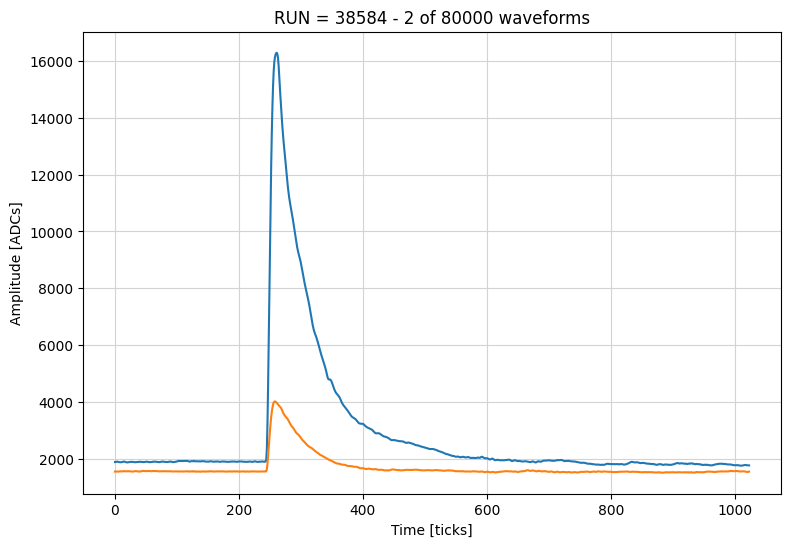

In [31]:
#Plot - RUN 38584
listaa=[7, 10]
l=len(listaa)
plt.figure(figsize=([9,6]))
for i in listaa:
    wf_prova = wfset.waveforms[i]
    plt.plot(wf_prova.adcs)
plt.grid(color='lightgrey')
plt.xlabel('Time [ticks]')
plt.ylabel('Amplitude [ADCs]')
plt.title('RUN = {:} - {:} of {:} waveforms'.format(run, l, n))

[   0    1    2 ... 1021 1022 1023]


Text(0.5, 1.0, 'RUN = 38584 - 2 of 80000 waveforms')

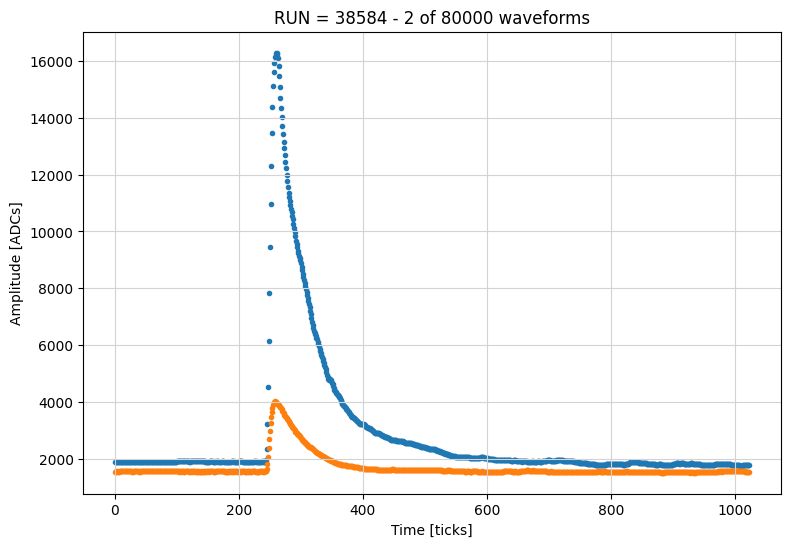

In [34]:
#Scatter
listaa=[7, 10]
tempo = np.arange(0, 1024)
print(tempo)
l=len(listaa)
plt.figure(figsize=([9,6]))
for i in listaa:
    wf_prova = wfset.waveforms[i]
    plt.scatter(tempo, wf_prova.adcs, marker='.')
plt.grid(color='lightgrey')
plt.xlabel('Time [ticks]')
plt.ylabel('Amplitude [ADCs]')
plt.title('RUN = {:} - {:} of {:} waveforms'.format(run, l, n))

#### Plot delle prime 100 singole waveforms del set.

Da qui verrà l'idea di fare una HeatMap o Persistence Map, andando a costruire una griglia sulle coordinate x e y
per poi applicare per ogni singolo "pixel" (per cui la griglia fa sì che si abbia più o meno una certa sensibilità)
un conteggio a mo' di istogramma.

In [ ]:
plt.figure(figsize=([9,6]))
lista_buoni= [10489, 10722, 10803, 10836, 10423, 10374, 10227]
for i in lista_buoni:
    plt.plot(mylist[i].adcs, label=i)
plt.grid(color='lightgrey')
plt.xlabel('Time [ticks]')
plt.ylabel('Amplitude [ADCs]')
plt.title('RUN = {:} - Waveforms (80000)'.format(run, m, n))
plt.legend(title='Indice wf')

Plot di tutte le singole waveforms del set.

Text(0.5, 1.0, 'RUN = 39105 - Waveforms (80000)')

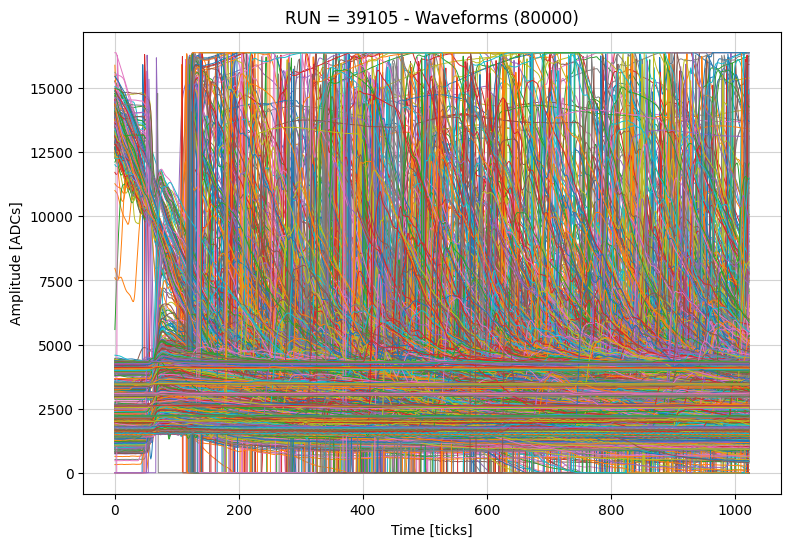

In [26]:
plt.figure(figsize=([9,6]))
for i in range(0, n-1):
    plt.plot(mylist[i].adcs, linewidth=0.7)
plt.grid(color='lightgrey')
plt.xlabel('Time [ticks]')
plt.ylabel('Amplitude [ADCs]')
plt.title('RUN = {:} - Waveforms (80000)'.format(run, m, n))

# Tesi - Grafici per vedere eventi ad alta energia

Text(0.5, 1.0, 'RUN = 38648 - 3 of 80000 waveforms')

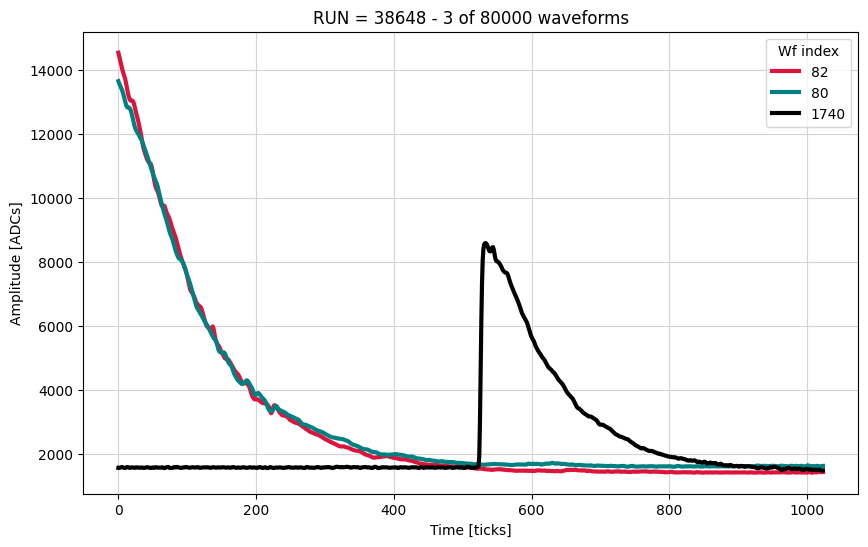

In [133]:
#Plot per viasualizzazione evento ad alta energia - RUN 38648
listaa=[82,80, 1740]
colors=['crimson', 'teal', 'black']
l=len(listaa)
plt.figure(figsize=([10,6]))
for i in range(0,l):
    j=listaa[i]
    wf_prova = wfset.waveforms[j]
    plt.plot(wf_prova.adcs, label=j, color=colors[i], linewidth=3)
plt.grid(color='lightgrey')
plt.xlabel('Time [ticks]')
plt.ylabel('Amplitude [ADCs]')
plt.legend(title='Wf index')
plt.title('RUN = {:} - {:} of {:} waveforms'.format(run, l, n))

# Tesi - Grafici per studiare la baseline

Text(0.5, 1.0, 'RUN = 38648 - 5 of 80000 waveforms')

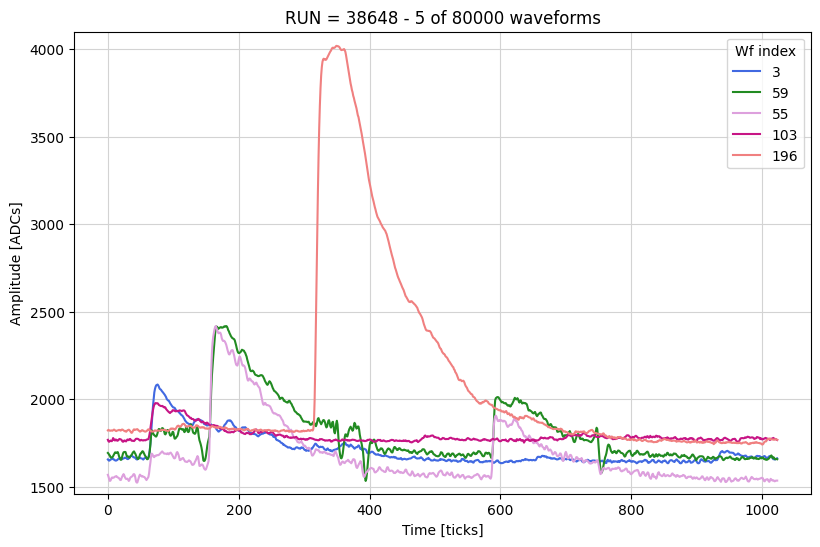

In [134]:
#Plot per metodo baseline - RUN 38648
listaa=[3, 59, 55, 103, 196]
colors=['royalblue', 'forestgreen', 'plum', 'mediumvioletred', 'lightcoral']
#listaa=[55, 196]
l=len(listaa)
plt.figure(figsize=([9.5,6]))
for j in range(0, l):
    i=listaa[j]
    wf_prova = wfset.waveforms[i]
    plt.plot(wf_prova.adcs, label=i, color=colors[j])
    #plt.plot(wf_prova.adcs, color='crimson') # darkred o crimson belli rossi
plt.grid(color='lightgrey')
plt.xlabel('Time [ticks]')
plt.ylabel('Amplitude [ADCs]')
plt.legend(title='Wf index')
plt.ylim(1460, 4100)
plt.title('RUN = {:} - {:} of {:} waveforms'.format(run, l, n))

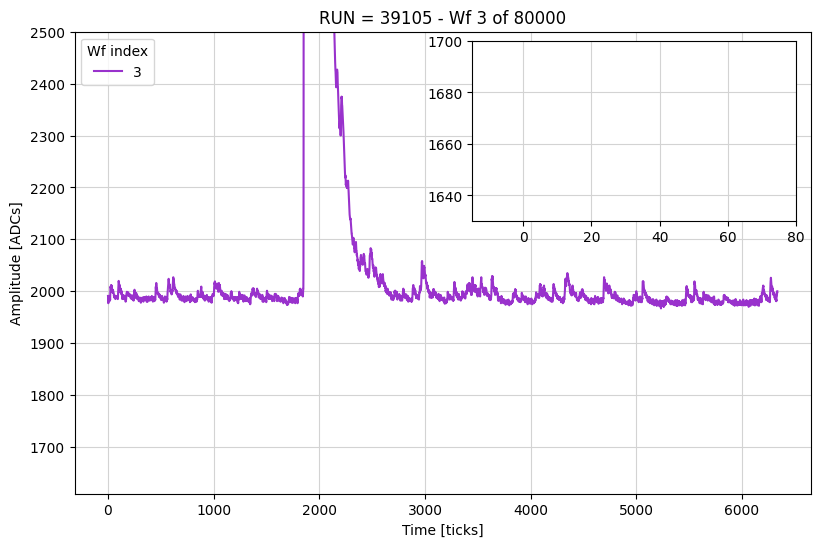

In [351]:
#Plot per metodo baseline - RUN 38648
fig, ax = plt.subplots(figsize=(9.5, 6))
index=3
wf_prova = wfset.waveforms[index]
signal=wf_prova.adcs
plt.plot(signal, label=index, color='darkorchid')
plt.xlabel('Time [ticks]')
plt.ylabel('Amplitude [ADCs]')
plt.legend(title='Wf index', loc='upper left')
plt.grid(color='lightgrey')
plt.title('RUN = {:} - Wf {:} of {:}'.format(run, index, n))
plt.ylim(1610, 2500)
ins_ax=ax.inset_axes([0.54,0.59,0.44,0.39])
ins_ax.plot(wf_prova.adcs, color='darkorchid')
ins_ax.set_ylim(1630, 1700)
ins_ax.set_xlim(-15,80)
ins_ax.grid(color='lightgrey')

Text(0.5, 1.0, 'RUN = 39105 - Wf 13 of 80000')

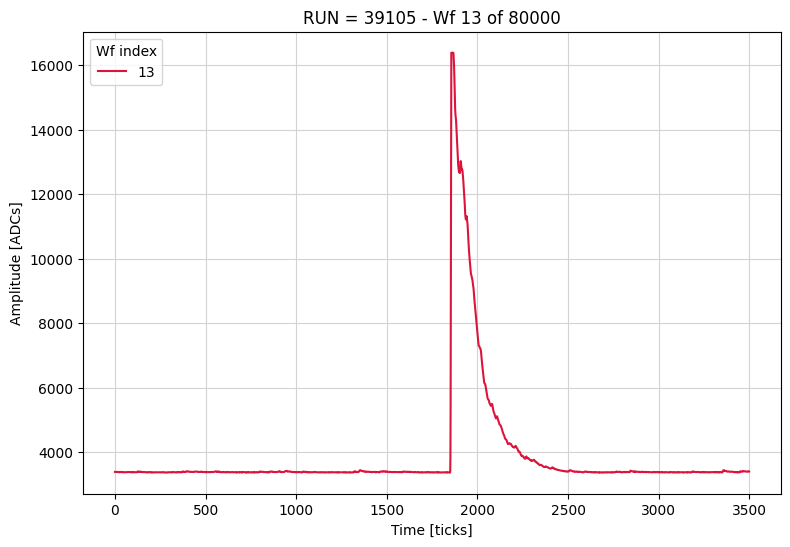

In [22]:
#Selezionamento del range per la baseline - RUN 39105
index=13
wf_prova = wfset.waveforms[index]
signal=wf_prova.adcs

ran=3500
baseline_range=signal[0:ran]
time=np.arange(0,ran)

fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(baseline_range, label=index, color='crimson')

plt.xlabel('Time [ticks]')
plt.ylabel('Amplitude [ADCs]')
plt.legend(title='Wf index', loc='upper left')
plt.grid(color='lightgrey')
plt.title('RUN = {:} - Wf {:} of {:}'.format(run, index, n))

Text(0.5, 1.0, 'RUN = 39105 - Wf 13 of 80000')

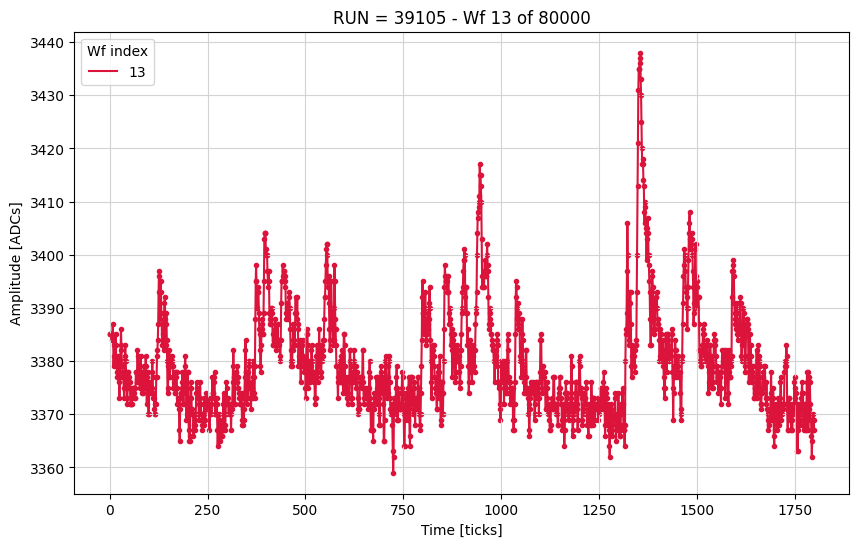

In [23]:
#Selezionamento del range per la baseline - RUN 39105
index=13
wf_prova = wfset.waveforms[index]
signal=wf_prova.adcs

ran=1800
baseline_range=signal[0:ran]
time=np.arange(0,ran)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(baseline_range, label=index, color='crimson')
plt.scatter(time, baseline_range, color='crimson', marker='.')
plt.xlabel('Time [ticks]')
plt.ylabel('Amplitude [ADCs]')
plt.legend(title='Wf index', loc='upper left')
plt.grid(color='lightgrey')
plt.title('RUN = {:} - Wf {:} of {:}'.format(run, index, n))

Text(0.5, 1.0, 'Histogram baseline')

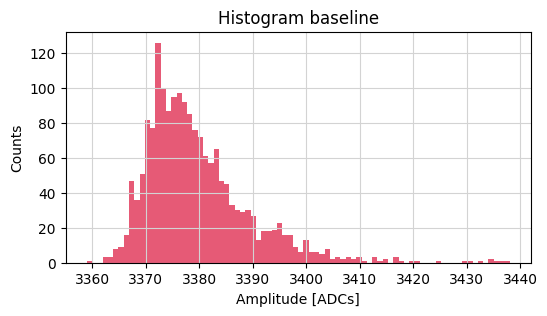

In [34]:
# Costruzione dell'istogramma
n_bins=80

fig, ax = plt.subplots(figsize=(6, 3))
plt.hist(baseline_range, bins=n_bins, color='crimson', alpha=0.7)
plt.ylabel('Counts')
plt.xlabel('Amplitude [ADCs]')
plt.grid(color='lightgrey')
plt.title('Histogram baseline')

Text(0.5, 1.0, 'Histogram baseline')

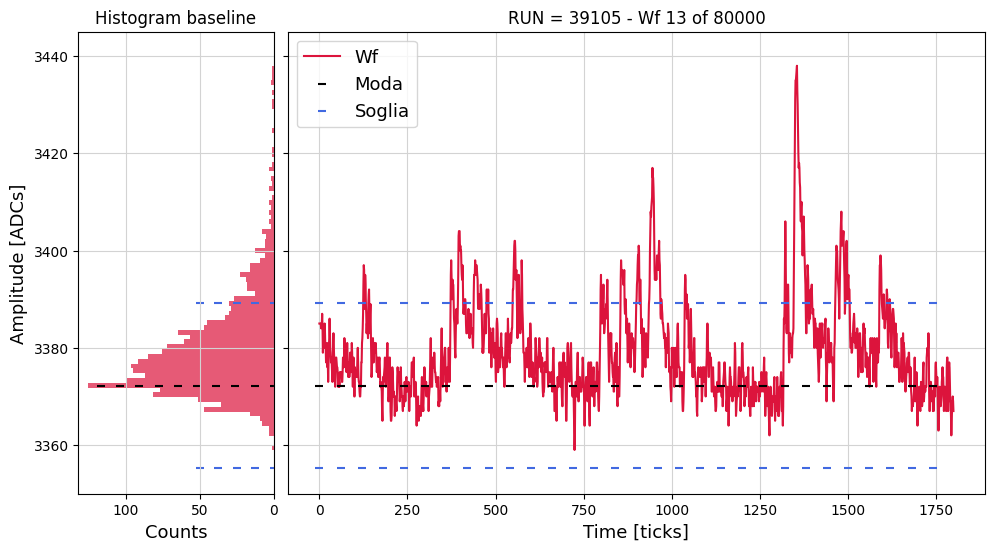

In [100]:
# Cerco di metterli insieme
fig, ax = plt.subplots(figsize=(9, 6))
#plt.scatter(time, baseline_range, color='crimson', marker='.')
plt.plot(baseline_range, color='crimson', label='Wf')
moda=3372.25
soglia=17
plt.scatter(np.arange(0, ran, 60), np.full(30, moda), marker='_', color='black', zorder=2, label='Moda')
plt.scatter(np.arange(0, ran, 60), np.full(30, moda-soglia), marker='_', color='royalblue', zorder=2, label='Soglia')
plt.scatter(np.arange(0, ran, 60), np.full(30, moda+soglia), marker='_', color='royalblue', zorder=2)

plt.ylim(3350, 3445)
plt.legend(fontsize=13, loc='upper left')
plt.xlabel('Time [ticks]', fontsize=13)
plt.grid(color='lightgrey')
plt.title('RUN = {:} - Wf {:} of {:}'.format(run, index, n))
plt.gca().set_yticklabels([])


ins_ax=ax.inset_axes([-0.3,0,0.28,1])
ins_ax.invert_xaxis()
counts, bins = np.histogram(baseline_range, bins=n_bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
ins_ax.barh(bin_centers, counts, height=np.diff(bins), color='crimson', alpha=0.7)
ins_ax.scatter(np.arange(0, 130, 13), np.full(10, moda), marker='_', color='black')
ins_ax.scatter(np.linspace(0, 50, 5), np.full(5, moda-soglia), marker='_', color='royalblue')
ins_ax.scatter(np.linspace(0, 50, 5), np.full(5, moda+soglia), marker='_', color='royalblue')

ins_ax.set_ylim(3350, 3445)
ins_ax.set_ylabel('Amplitude [ADCs]', fontsize=13)
ins_ax.set_xlabel('Counts', fontsize=13)
ins_ax.grid(color='lightgrey')
ins_ax.set_title('Histogram baseline')

# Tesi - Grafico per metodo "Amplitude" di Time Resolution

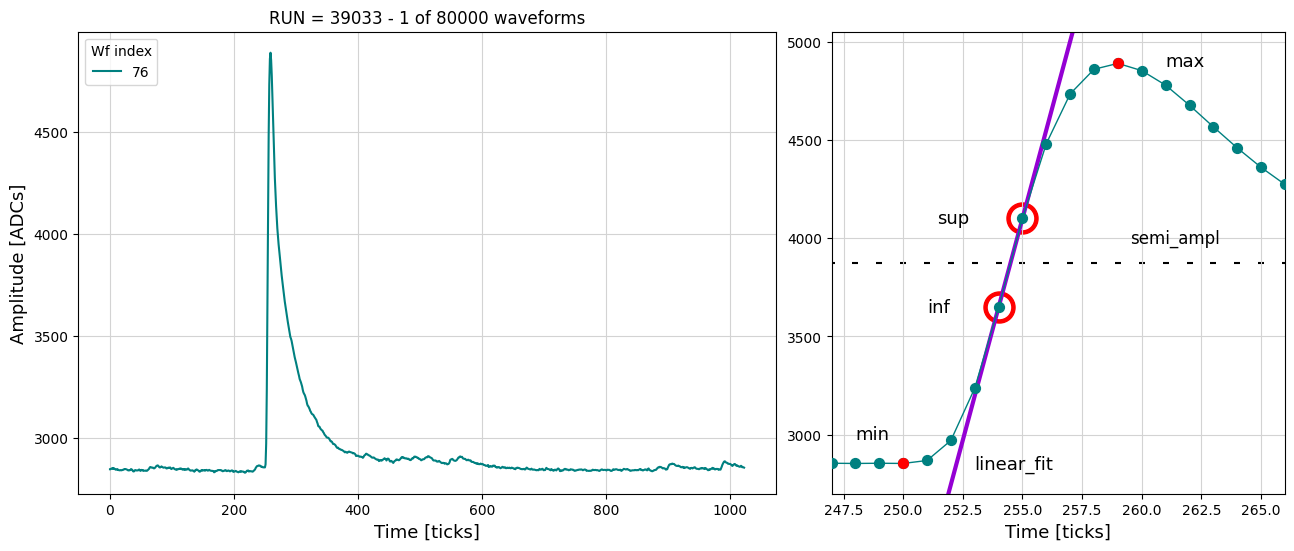

In [22]:
#Plot for time resolution "amplitude" methode - RUN 39033
#listaa=[11, 12, 44, 45, 75, 76, 92, 93] #buoni
listaa=[76]
l=len(listaa)
time=np.arange(0, 1024)
fig, ax = plt.subplots(figsize=(9, 6))
for i in listaa:
    wf_prova = wfset.waveforms[i]
    y=wf_prova.adcs
    plt.plot(y, label=i, color='teal')
    #plt.scatter(time, wf_prova.adcs, label=i, marker='.', s=30, color='teal')
#punti per metodo amplitude
index_max=np.argmax(y)
maximum=max(y)
index_min=time[250]
minimum=y[250]
semi_ampl=(maximum+minimum)/2
index_sup_ampl=255
index_inf_ampl=254
sup_ampl=y[index_sup_ampl]
inf_ampl=y[index_inf_ampl]
#retta di fit
m=(sup_ampl-inf_ampl)/(index_sup_ampl-index_inf_ampl)
x_r=np.arange(250, 260, 0.05)
y_r=m*(x_r-index_sup_ampl)+sup_ampl

plt.grid(color='lightgrey')
plt.xlabel('Time [ticks]', fontsize=13)
plt.ylabel('Amplitude [ADCs]', fontsize=13)
plt.legend(title='Wf index', loc='upper left')
plt.title('RUN = {:} - {:} of {:} waveforms'.format(run, l, n))
#ins_ax=ax.inset_axes([0.6,0.29,0.38,0.69])
ins_ax=ax.inset_axes([1.08,0,0.65,1])
ins_ax.scatter(time, wf_prova.adcs, color='teal', marker='.', s=200, zorder=5)
ins_ax.plot(wf_prova.adcs, color='teal', linewidth=1, zorder=4)
ins_ax.scatter(index_max, maximum, color='red', marker='.', s=200, zorder=6) #max_wf_pick
ins_ax.scatter(index_min, minimum, color='red', marker='.', s=200, zorder=7) #min_wf_pick
ins_ax.scatter(time, np.full(1024, semi_ampl), marker='_', color='black', s=20)
ins_ax.scatter(index_sup_ampl, sup_ampl, color='white', s=250, zorder=-1) 
ins_ax.scatter(index_inf_ampl, inf_ampl, color='white', s=250, zorder=-2) 
ins_ax.scatter(index_sup_ampl, sup_ampl, color='red', s=500, zorder=-3) 
ins_ax.scatter(index_inf_ampl, inf_ampl, color='red', s=500, zorder=-4) 
ins_ax.text(251.4, 4100, 'sup', va='center', fontsize=13)
ins_ax.text(251, 3650, 'inf', va='center', fontsize=13)
ins_ax.text(261, 4900, 'max', va='center', fontsize=13)
ins_ax.text(248, 3000, 'min', va='center', fontsize=13)
ins_ax.text(259.5, 4000, 'semi_ampl', va='center', fontsize=12)
ins_ax.text(253, 2850, 'linear_fit', va='center', fontsize=13)
ins_ax.plot(x_r, y_r, color='darkviolet', linewidth=3)
ins_ax.set_xlabel('Time [ticks]', fontsize=13)
ins_ax.set_ylim(2700, 5050)
ins_ax.set_xlim(247, 266)
ins_ax.grid(color='lightgrey')

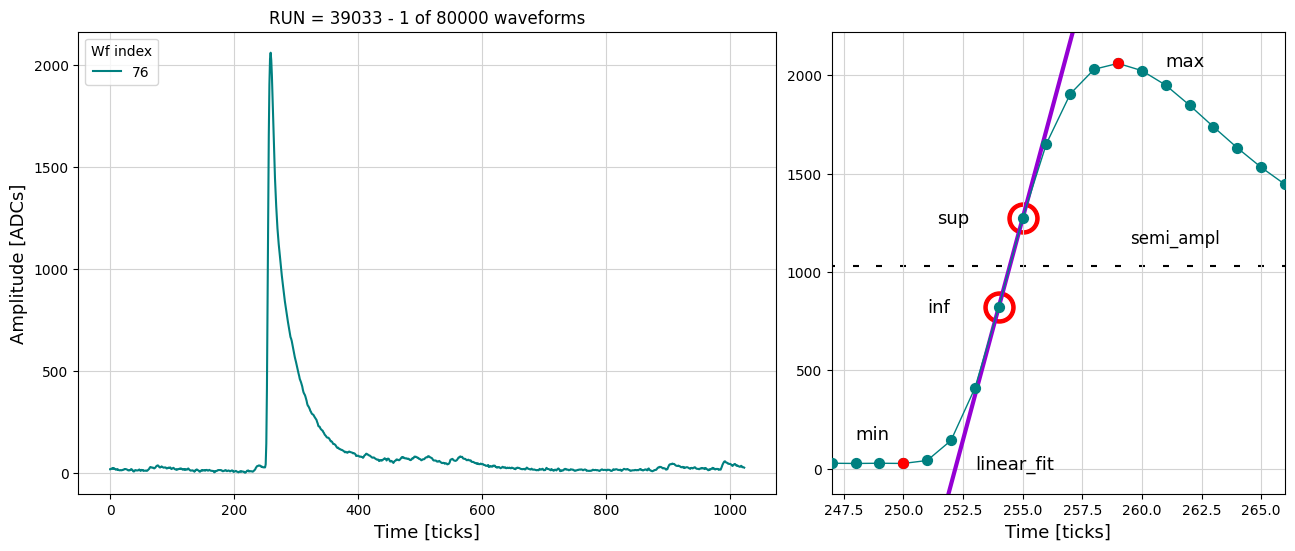

In [23]:
#Plot for time resolution "amplitufe" methode riscalata la baseline a 0- RUN 39033
listaa=[76]
l=len(listaa)
time=np.arange(0, 1024)
fig, ax = plt.subplots(figsize=(9, 6))
for i in listaa:
    wf_prova = wfset.waveforms[i]
    y=wf_prova.adcs
    baseline=int(min(y))
    yy=y-baseline
    plt.plot(yy, label=i, color='teal')
#punti per metodo amplitude
index_max=np.argmax(y)
maximum=max(yy)
index_min=time[250]
minimum=yy[250]
semi_ampl=maximum/2
index_sup_ampl=255
index_inf_ampl=254
sup_ampl=yy[index_sup_ampl]
inf_ampl=yy[index_inf_ampl]
#retta di fit
m=(sup_ampl-inf_ampl)/(index_sup_ampl-index_inf_ampl)
x_r=np.arange(250, 260, 0.05)
y_r=m*(x_r-index_sup_ampl)+sup_ampl


plt.grid(color='lightgrey')
plt.xlabel('Time [ticks]', fontsize=13)
plt.ylabel('Amplitude [ADCs]', fontsize=13)
plt.legend(title='Wf index', loc='upper left')
plt.title('RUN = {:} - {:} of {:} waveforms'.format(run, l, n))
ins_ax=ax.inset_axes([1.08,0,0.65,1])
ins_ax.scatter(time, yy, color='teal', marker='.', s=200, zorder=5)
ins_ax.plot(yy, color='teal', linewidth=1, zorder=4)
ins_ax.scatter(index_max, maximum, color='red', marker='.', s=200, zorder=6) #max_wf_pick
ins_ax.scatter(index_min, minimum, color='red', marker='.', s=200, zorder=7) #min_wf_pick
ins_ax.scatter(time, np.full(1024, semi_ampl), marker='_', color='black', s=20)
ins_ax.scatter(index_sup_ampl, sup_ampl, color='white', s=250, zorder=-1) 
ins_ax.scatter(index_inf_ampl, inf_ampl, color='white', s=250, zorder=-2) 
ins_ax.scatter(index_sup_ampl, sup_ampl, color='red', s=500, zorder=-3) 
ins_ax.scatter(index_inf_ampl, inf_ampl, color='red', s=500, zorder=-4) 
ins_ax.text(251.4, 4100-baseline, 'sup', va='center', fontsize=13)
ins_ax.text(251, 3650-baseline, 'inf', va='center', fontsize=13)
ins_ax.text(261, 4900-baseline, 'max', va='center', fontsize=13)
ins_ax.text(248, 3000-baseline, 'min', va='center', fontsize=13)
ins_ax.text(259.5, 4000-baseline, 'semi_ampl', va='center', fontsize=12)
ins_ax.text(253, 2850-baseline, 'linear_fit', va='center', fontsize=13)
ins_ax.plot(x_r, y_r, color='darkviolet', linewidth=3)
ins_ax.set_xlabel('Time [ticks]', fontsize=13)
ins_ax.set_ylim(2700-baseline, 5050-baseline)
ins_ax.set_xlim(247, 266)
ins_ax.grid(color='lightgrey')